In [1]:
library(haven)
library(tidyverse)
library(broom)
library(lme4) 
library(latex2exp)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand



In [2]:
AA_Sex_1 <- read_sav("C:/Users/Personal/AA leche/datos/AMINOACIDOS POR SEXO_1.sav")
head(AA_Sex_1) 

ID,GROUP,MATERNALAGE,SEXO,INFANTDOB,MATBMI1COLL,MATBMI215d,MATBMI32mos,MATBMI44mos,BABYWeigth1g,...,ALAGLOB,ASNGLOB,SYSGLOB,GLYGLOB,GLUGLOB,GLNGLOB,PROLINEGLOB,SERINEGLOB,TYRAMINEGLOB,new
1,0,17,1,2009-08-20,25,24,24,22,3492.7,...,21.25,0.5,1.00,10.00,87.25,23.25,2.75,8.0,1.00,0
2,0,16,2,2009-08-24,32,31,30,29,3392.9,...,18.25,0.0,0.75,13.75,100.50,40.50,2.50,9.5,0.75,0
3,0,17,2,2009-08-21,23,23,NA,NA,2993.8,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
4,0,16,2,2009-08-21,26,NA,NA,NA,3692.3,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
5,0,16,NA,2009-08-29,25,NA,NA,NA,3592.5,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
6,0,16,2,2009-08-27,29,28,30,31,3093.5,...,15.50,0.5,1.50,10.25,74.75,30.00,5.25,8.0,2.00,0


In [3]:
AA_E <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 62:97) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 


names(AA_E)

Warning message:
"`as_dictionary()` is soft-deprecated as of rlang 0.3.0.
Please use `as_data_pronoun()` instead
This warning is displayed once per session."Warning message:
"`new_overscope()` is soft-deprecated as of rlang 0.2.0.
Please use `new_data_mask()` instead
This warning is displayed once per session."Warning message:
"The `parent` argument of `new_data_mask()` is deprecated.
The parent of the data mask is determined from either:

  * The `env` argument of `eval_tidy()`
  * Quosure environments when applicable
This warning is displayed once per session."Warning message:
"`overscope_clean()` is soft-deprecated as of rlang 0.2.0.
This warning is displayed once per session."

[1] "id"            "group"         "age"           "sex"          
 [5] "HISCalostrum"  "HISTransition" "HISMature2m"   "HISMature4m"  
 [9] "ILECalostrum"  "ILETransition" "ILEMature2m"   "ILEMature4m"  
[13] "LEUCalostrum"  "LEUTransition" "LEUMature2m"   "LEUMature4m"  
[17] "LYSCalostrum"  "LYSTransition" "LYSMature2m"   "LYSMature4m"  
[21] "METCalostrum"  "METTransition" "METMature2m"   "METMature4m"  
[25] "PHECalostrum"  "PHETransition" "PHEMature2m"   "PHEMature4m"  
[29] "THRCalostrum"  "THRTransition" "THRMature2m"   "THRMature4m"  
[33] "TRPCalostrum"  "TRPTransition" "TRPMature2m"   "TRPMature4m"  
[37] "VALCalostrum"  "VALTransition" "VALMature2m"   "VALMature4m"

In [4]:
AA_NE <- AA_Sex_1 %>%  select(id = ID, group = GROUP, age = MATERNALAGE, sex = SEXO, 58:61, 102:141) %>%
                         mutate(id = factor(id), 
                                sex =  factor(sex, labels = c('girl', 'boy')),
                                group = factor(group, labels = c('teen', 'adult'))) 

names(AA_NE)

[1] "id"            "group"         "age"           "sex"          
 [5] "ARGCalostrum"  "ARGTransition" "ARGMature2m"   "ARGMature4m"  
 [9] "ASPCalostrum"  "ASPTransition" "ASPMature2m"   "ASPMature4m"  
[13] "ALACalostrum"  "ALATransition" "ALAMature2m"   "ALAMature4m"  
[17] "ASNCalostrum"  "ASNTransition" "ASNMature2m"   "ASNMature4m"  
[21] "CYSCalostrum"  "CYSTransition" "CYSMature2m"   "CYSMature4m"  
[25] "GLYCalostrum"  "GLYTransition" "GLYMature2m"   "GLYMature4m"  
[29] "GLUCalostrum"  "GLUTransition" "GLUMature2m"   "GLUMature4m"  
[33] "GLNCalostrum"  "GLNTransition" "GLNMature2m"   "GLNMature4m"  
[37] "PROCalostrum"  "PROTransition" "PROMature2m"   "PROMature4m"  
[41] "SERCalostrum"  "SERTransition" "SERMature2m"   "SERMature4m"  
[45] "TYRCalostrum"  "TYRTransition" "TYRMature2m"   "TYRMature4m"

In [5]:
# Removing NAs
AA_E_Long <- AA_E %>% gather(weekNames, level, 5:length(names(AA_E))) 
AA_NE_Long <- AA_NE %>% gather(weekNames, level, 5:length(names(AA_NE))) 

head(AA_E_Long)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,age,sex,weekNames,level
1,teen,17,girl,HISCalostrum,2
2,teen,16,boy,HISCalostrum,1
3,teen,17,boy,HISCalostrum,2
4,teen,16,boy,HISCalostrum,1
5,teen,16,NA,HISCalostrum,1
6,teen,16,boy,HISCalostrum,1


In [6]:
AA_E_Long <- 
    AA_E_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_E_Long <- 
    AA_E_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_E_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,HISCalostrum,2,1,HIS
2,teen,16,boy,HISCalostrum,1,1,HIS
3,teen,17,boy,HISCalostrum,2,1,HIS
4,teen,16,boy,HISCalostrum,1,1,HIS
5,teen,16,NA,HISCalostrum,1,1,HIS
6,teen,16,boy,HISCalostrum,1,1,HIS


In [7]:
AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(week = gsub(".*Calostrum.*", "1", weekNames)) %>%
        mutate(week = gsub(".*Transition.*", "2", week)) %>%
        mutate(week = gsub(".*Mature2m.*", "8", week)) %>%
        mutate(week = gsub(".*Mature4m.*", "16", week)) %>% 
        mutate(week = as.numeric(week))

AA_NE_Long <- 
    AA_NE_Long %>% 
        mutate(AA = gsub("Calostrum.*", "", weekNames)) %>%
        mutate(AA = gsub("Transition.*", "", AA)) %>%
        mutate(AA = gsub("Mature2m.*", "", AA)) %>%
        mutate(AA = gsub("Mature4m.*", "", AA))

head(AA_NE_Long)

id,group,age,sex,weekNames,level,week,AA
1,teen,17,girl,ARGCalostrum,1,1,ARG
2,teen,16,boy,ARGCalostrum,1,1,ARG
3,teen,17,boy,ARGCalostrum,1,1,ARG
4,teen,16,boy,ARGCalostrum,1,1,ARG
5,teen,16,NA,ARGCalostrum,2,1,ARG
6,teen,16,boy,ARGCalostrum,2,1,ARG


## Weight and size of babies

In [8]:
weight <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 10:13) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))

headC <- AA_Sex_1 %>% select(id = ID, group = GROUP, sex = SEXO, 14:17) %>% 
                        mutate(id = factor(id), 
                               sex =  factor(sex, labels = c('girl', 'boy')),
                               group = factor(group, labels = c('teen', 'adult')))


head(weight)

id,group,sex,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g
1,teen,girl,3492.7,3592.5,5488.6,8282.74
2,teen,boy,3392.9,4091.5,5987.5,7883.57
3,teen,boy,2993.8,3592.5,NA,NA
4,teen,boy,3692.3,NA,NA,NA
5,teen,NA,3592.5,NA,NA,NA
6,teen,boy,3093.5,3392.9,4989.6,6785.80


In [9]:
weightLong <- weight %>% gather(weekNames, weight, -id, -group, -sex)
headCLong <- headC %>% gather(weekNames, head, -id, -group, -sex)

weightLong %>% filter(id == 4)
headCLong %>% filter(id == 4)

Warning message:
"attributes are not identical across measure variables; they will be dropped"Warning message:
"attributes are not identical across measure variables; they will be dropped"

id,group,sex,weekNames,weight
4,teen,boy,BABYWeigth1g,3692.3
4,teen,boy,BABYWeigth2g,NA
4,teen,boy,BABYWeigth3g,NA
4,teen,boy,BABYWeigth4g,NA


id,group,sex,weekNames,head
4,teen,boy,HeadCircumcm1,37
4,teen,boy,HCcm2,NA
4,teen,boy,HCcm3,NA
4,teen,boy,HCcm4,NA


In [10]:
weightLong <- 
    weightLong %>% 
        mutate(week = gsub(".*1g", "1", weekNames)) %>%
        mutate(week = gsub(".*2g", "2", week)) %>%
        mutate(week = gsub(".*3g", "8", week)) %>%
        mutate(week = gsub(".*4g", "16", week)) %>% 
        mutate(week = as.numeric(week))

weightLong %>% filter(id == 1)

id,group,sex,weekNames,weight,week
1,teen,girl,BABYWeigth1g,3492.70,1
1,teen,girl,BABYWeigth2g,3592.50,2
1,teen,girl,BABYWeigth3g,5488.60,8
1,teen,girl,BABYWeigth4g,8282.74,16


In [11]:
headCLong <- 
    headCLong %>% 
        mutate(week = gsub(".*cm1", "1", weekNames)) %>%
        mutate(week = gsub(".*cm2", "2", week)) %>%
        mutate(week = gsub(".*cm3", "8", week)) %>%
        mutate(week = gsub(".*cm4", "16", week)) %>% 
        mutate(week = as.numeric(week))

headCLong %>% filter(id == 1)

id,group,sex,weekNames,head,week
1,teen,girl,HeadCircumcm1,34,1
1,teen,girl,HCcm2,37,2
1,teen,girl,HCcm3,39,8
1,teen,girl,HCcm4,42,16


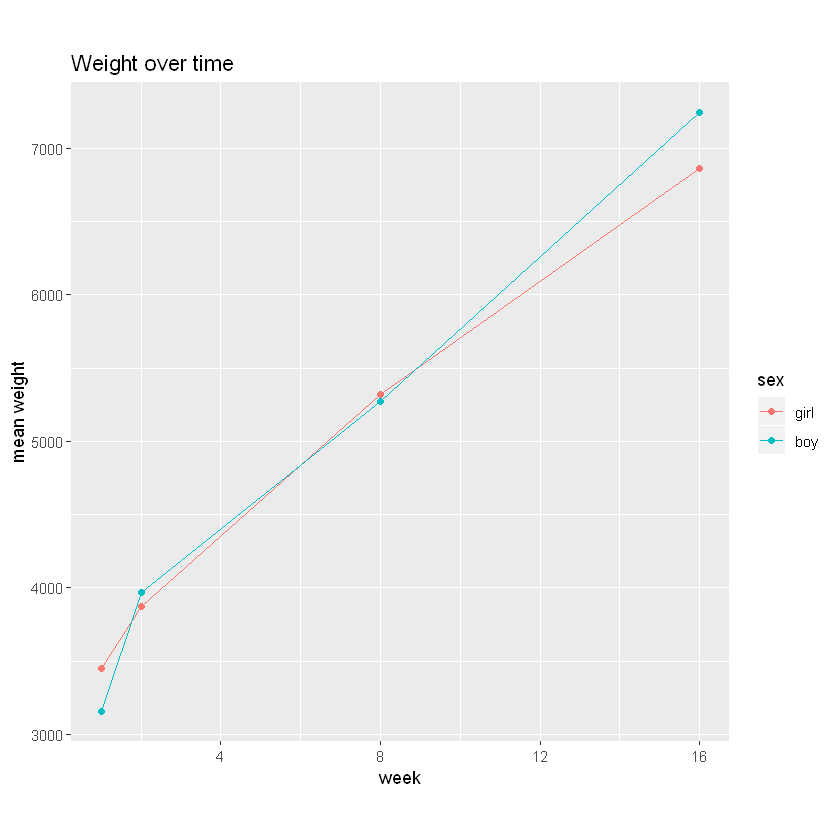

In [12]:
weightDist <- weightLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(weight, na.rm = T), sd = sd(weight, na.rm = T))

#png(filename="./plots/weight.png", units="cm", width=15, height=15, res = 300)
ggplot(weightDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_linerange(aes(ymin = mean - 2*sd, ymax = mean + 2*sd)) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Weight over time') + ylab('mean weight')
#dev.off()

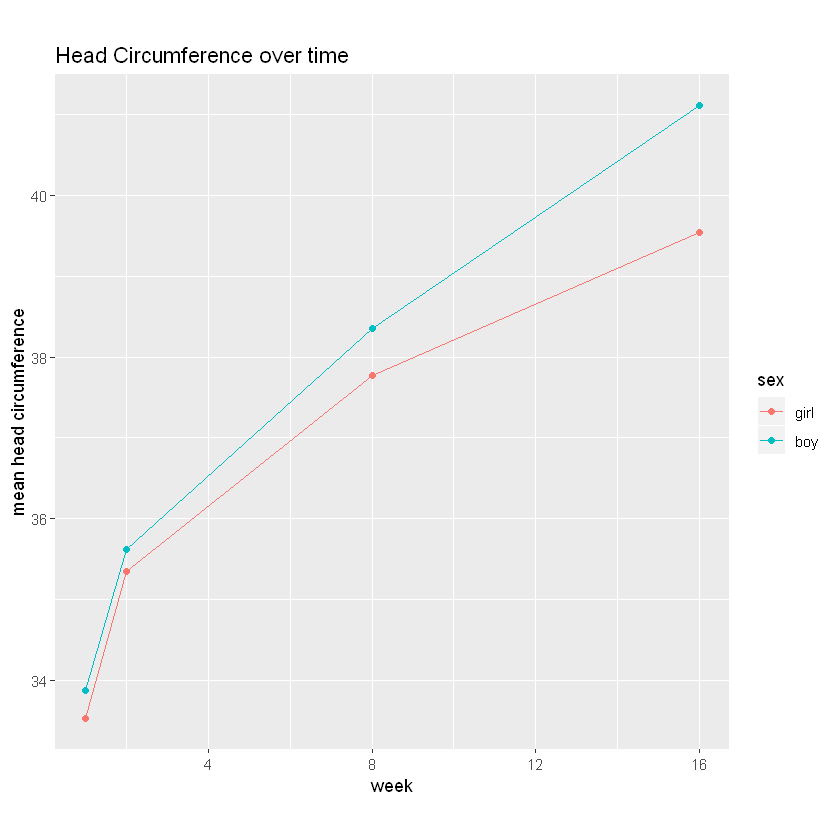

In [13]:
headCDist <- headCLong %>% filter(!is.na(sex)) %>% group_by(sex, week) %>% 
        summarise(mean = mean(head, na.rm = T), sd = sd(head, na.rm = T))

#png(filename="./plots/head_c.png", units="cm", width=15, height=15, res = 300)
ggplot(headCDist, aes(x = week, y = mean, color = sex)) + 
    geom_point() + 
    #geom_errorbar(aes(ymin = mean - 2*sd, ymax = mean + 2*sd), alpha = 0.5) + 
    geom_line() + #geom_smooth(method = lm, se = F) +
    theme(aspect.ratio = 1) +
    ggtitle('Head Circumference over time') + ylab('mean head circumference')
#dev.off()

In [14]:
summary(lm(weightDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = weightDist)

Residuals:
      1       2       3       4       5       6       7       8 
-142.77   58.29  165.70  -81.21 -279.17  276.06   40.34  -37.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3365.70     174.91  19.243  4.3e-05 ***
week          223.54      19.40  11.520 0.000324 ***
sexboy       -185.37     247.35  -0.749 0.495267    
week:sexboy    32.75      27.44   1.194 0.298597    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 231.8 on 4 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.9775 
F-statistic: 102.4 on 3 and 4 DF,  p-value: 0.0003084


In [15]:
summary(lm(headCDist, formula = mean ~ week + sex + week:sex))


Call:
lm(formula = mean ~ week + sex + week:sex, data = headCDist)

Residuals:
      1       2       3       4       5       6       7       8 
-0.9137  0.5435  0.7621 -0.3919 -0.7740  0.5162  0.5478 -0.2901 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.07687    0.66572  51.188 8.72e-07 ***
week         0.36628    0.07385   4.959  0.00771 ** 
sexboy       0.12198    0.94147   0.130  0.90317    
week:sexboy  0.08387    0.10445   0.803  0.46700    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8824 on 4 degrees of freedom
Multiple R-squared:  0.9403,	Adjusted R-squared:  0.8955 
F-statistic: 20.99 on 3 and 4 DF,  p-value: 0.006556


In [138]:
weight %>% inner_join(headC, by = 'id') %>% select(contains('Weigth'), contains('cm')) %>% cor(use="complete.obs")

,BABYWeigth1g,BABYWeigth2g,BABYWeigth3g,BABYWeigth4g,HeadCircumcm1,HCcm2,HCcm3,HCcm4
BABYWeigth1g,1.0000000,0.18492505,0.6236000,0.3964243,0.52235889,0.5382875,0.5883136,0.19971893
BABYWeigth2g,0.1849250,1.00000000,0.3589664,0.2509749,0.07017043,0.2817560,0.1265833,-0.08215091
BABYWeigth3g,0.6236000,0.35896645,1.0000000,0.7727088,0.78427813,0.8303841,0.8158937,0.54844962
BABYWeigth4g,0.3964243,0.25097489,0.7727088,1.0000000,0.66359782,0.6963510,0.7417554,0.68986933
HeadCircumcm1,0.5223589,0.07017043,0.7842781,0.6635978,1.00000000,0.8338292,0.8214121,0.75736063
HCcm2,0.5382875,0.28175596,0.8303841,0.6963510,0.83382922,1.0000000,0.7285378,0.64730848
HCcm3,0.5883136,0.12658332,0.8158937,0.7417554,0.82141209,0.7285378,1.0000000,0.74281294
HCcm4,0.1997189,-0.08215091,0.5484496,0.6898693,0.75736063,0.6473085,0.7428129,1.00000000


## Weight and size of babies = Week?

In [144]:
headCDist
cor(weightDist[2:3])
cor(headCDist[2:3])

sex,week,mean,sd
girl,1,33.52941,0.8744746
girl,2,35.35294,1.4116115
girl,8,37.76923,1.0919284
girl,16,39.54545,1.3684763
boy,1,33.87500,1.3619246
boy,2,35.61538,1.3587324
boy,8,38.34783,1.5553046
boy,16,41.11111,1.5676468


,week,mean
week,1.0000000,0.9911695
mean,0.9911695,1.0000000


,week,mean
week,1.0000000,0.9552353
mean,0.9552353,1.0000000


### Weight and size effect on AA:

$AA = \alpha_0 + \alpha_1 \ week + \alpha_2 \ sex + \alpha_3 \ weight + \alpha_4 \ sex \times weight + \alpha_{id}$

and 

$AA = \alpha_0 + \alpha_1 \ week + \alpha_2 \ sex + \alpha_3 \ head + \alpha_4 \ sex \times head + \alpha_{id}$

In [17]:
meWeight <- function(df){
    
    me <- lmer(level ~ sex + week + weight + sex:weight + (1 | id), data = df)
    
    return(me)
}

In [18]:
meHead <- function(df){
    
    me <- lmer(level ~ sex + week + head + sex:head + (1 | id), data = df)
    
    return(me)
}

In [19]:
AA_E_Nested <- AA_E_Long %>% group_by(AA) %>% nest()
AA_NE_Nested <- AA_NE_Long %>% group_by(AA) %>% nest()

In [20]:
nAA_E <- length(AA_E_Nested$AA)
nAA_NE <- length(AA_NE_Nested$AA)

In [21]:
AA_E_Nested$data[[1]] %>% filter(id == 2)

id,group,age,sex,weekNames,level,week
2,teen,16,boy,HISCalostrum,1,1
2,teen,16,boy,HISTransition,3,2
2,teen,16,boy,HISMature2m,2,8
2,teen,16,boy,HISMature4m,2,16


In [22]:
w <- weightLong %>% select(id, weight, week) %>% mutate(weight = weight/1000)
w %>% filter(id == 2)

id,weight,week
2,3.39290,1
2,4.09150,2
2,5.98750,8
2,7.88357,16


In [23]:
hc <- headCLong %>% select(id, head, week) 
hc %>% filter(id == 2)

id,head,week
2,35,1
2,37,2
2,38,8
2,41,16


In [24]:
AA_E_Nested$data[[1]] %>% left_join(w, by = c('id', 'week')) %>% 
    left_join(hc, by = c('id', 'week')) %>% filter(id == 2)

id,group,age,sex,weekNames,level,week,weight,head
2,teen,16,boy,HISCalostrum,1,1,3.39290,35
2,teen,16,boy,HISTransition,3,2,4.09150,37
2,teen,16,boy,HISMature2m,2,8,5.98750,38
2,teen,16,boy,HISMature4m,2,16,7.88357,41


In [25]:
me_E_W <- list()
me_E_HC <- list()

tidy_E_W <- list()
tidy_E_HC <- list()

for(i in 1:nAA_E){
    
    w <- weightLong %>% select(id, weight, week) %>% mutate(weight = weight/1000)
    hc <- headCLong %>% select(id, head, week)
    
    AA_E_wh <- AA_E_Nested$data[[i]] %>% left_join(w, by = c('id', 'week')) %>% left_join(hc, by = c('id', 'week'))
    
    me_E_W[[i]] <- meWeight(AA_E_wh)
    me_E_HC[[i]] <- meHead(AA_E_wh)
    
    tidy_E_W[[i]] <- tidy(me_E_W[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    tidy_E_HC[[i]] <- tidy(me_E_HC[[i]], effects = 'fixed') %>% mutate(AA = AA_E_Nested$AA[i])
    
}

In [26]:
me_NE_W <- list()
me_NE_HC <- list()

tidy_NE_W <- list()
tidy_NE_HC <- list()

for(i in 1:nAA_NE){
    
    w <- weightLong %>% select(id, weight, week) %>% mutate(weight = weight/1000)
    hc <- headCLong %>% select(id, head, week)
    
    AA_NE_wh <- AA_NE_Nested$data[[i]] %>% left_join(w, by = c('id', 'week')) %>% left_join(hc, by = c('id', 'week'))
    
    me_NE_W[[i]] <- meWeight(AA_NE_wh)
    me_NE_HC[[i]] <- meHead(AA_NE_wh)
    
    tidy_NE_W[[i]] <- tidy(me_NE_W[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])
    tidy_NE_HC[[i]] <- tidy(me_NE_HC[[i]], effects = 'fixed') %>% mutate(AA = AA_NE_Nested$AA[i])
    
}

In [27]:
me_E_W[[1]]
tidy_E_W[[1]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + weight + sex:weight + (1 | id)
   Data: df
REML criterion at convergence: 414.748
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 0.3059  
 Residual             0.8614  
Number of obs: 152, groups:  id, 54
Fixed Effects:
  (Intercept)         sexboy           week         weight  sexboy:weight  
      1.53318       -0.16948       -0.02101        0.10194        0.06432  

term,estimate,std.error,statistic,AA
(Intercept),1.53317965,0.43026286,3.5633558,HIS
sexboy,-0.16947541,0.45669894,-0.3710878,HIS
week,-0.02101240,0.02606095,-0.8062794,HIS
weight,0.10193713,0.10959273,0.9301450,HIS
sexboy:weight,0.06431513,0.09289172,0.6923667,HIS


In [28]:
me_NE_W[[8]]
tidy_NE_W[[8]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + weight + sex:weight + (1 | id)
   Data: df
REML criterion at convergence: 1297.268
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept)  8.048  
 Residual             16.771  
Number of obs: 152, groups:  id, 54
Fixed Effects:
  (Intercept)         sexboy           week         weight  sexboy:weight  
        3.231         -1.337          1.377          4.582          1.088  

term,estimate,std.error,statistic,AA
(Intercept),3.230994,8.6623510,0.3729928,GLN
sexboy,-1.337214,9.1109235,-0.1467704,GLN
week,1.376701,0.5236165,2.6292166,GLN
weight,4.582458,2.2020112,2.0810329,GLN
sexboy:weight,1.088165,1.8337339,0.5934149,GLN


In [29]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E_W, tidy = tidy_E_W)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE_W, tidy = tidy_NE_W)

In [85]:
weightCoef_E <- bind_rows(tidy_E_W) %>% filter(grepl("weight", term)) %>% 
    mutate(term = factor(term, levels=c("weight","sexboy:weight")))
weightCoef_NE <- bind_rows(tidy_NE_W) %>% filter(grepl("weight", term)) %>% 
    mutate(term = factor(term, levels=c("weight","sexboy:weight")))

weightCoef_E
weightCoef_NE

term,estimate,std.error,statistic,AA
weight,0.1019371296,0.109592727,0.93014503,HIS
sexboy:weight,0.0643151323,0.092891716,0.69236671,HIS
weight,-0.0540401115,0.066129536,-0.81718570,ILE
sexboy:weight,-0.0159886334,0.054591905,-0.29287553,ILE
weight,-0.0746737891,0.161428361,-0.46258160,LEU
sexboy:weight,0.0773194501,0.139249401,0.55525876,LEU
weight,-0.0724323102,0.160134195,-0.45232257,LYS
sexboy:weight,-0.1375761390,0.136003405,-1.01156393,LYS
weight,-0.0258857011,0.041561937,-0.62282230,MET
sexboy:weight,0.0201771097,0.035202447,0.57317349,MET


term,estimate,std.error,statistic,AA
weight,0.009402506,0.10533508,0.08926281,ARG
sexboy:weight,-0.080371565,0.08777944,-0.91560807,ARG
weight,0.326208627,0.32017974,1.01882968,ASP
sexboy:weight,0.301673380,0.26730708,1.12856488,ASP
weight,0.859809499,1.12997987,0.76090691,ALA
sexboy:weight,1.179983932,0.95223371,1.23917471,ALA
weight,-0.198122983,0.08360795,-2.36966668,ASN
sexboy:weight,0.094610247,0.07211628,1.31191247,ASN
weight,-0.070840653,0.10781595,-0.65705169,CYS
sexboy:weight,0.076718942,0.08981499,0.85418866,CYS


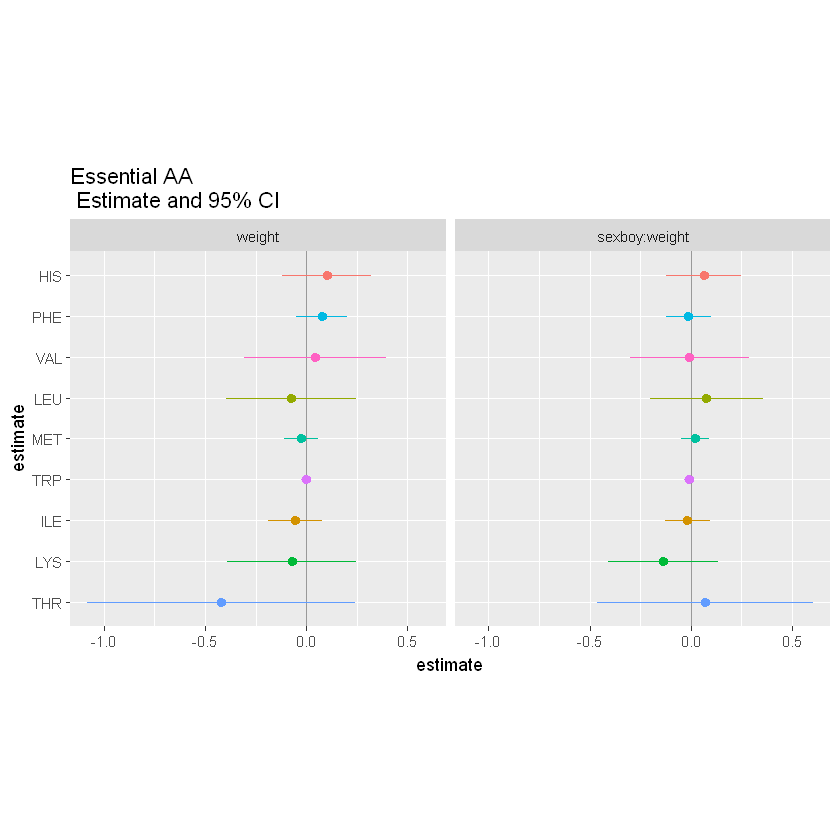

In [103]:
#png(filename="./plots/weight_E.png", units="cm", width=20, height=20, res = 300)
ggplot(weightCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + 
    geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) +
    ggtitle('Essential AA \n Estimate and 95% CI') + xlab('estimate')    
#dev.off()

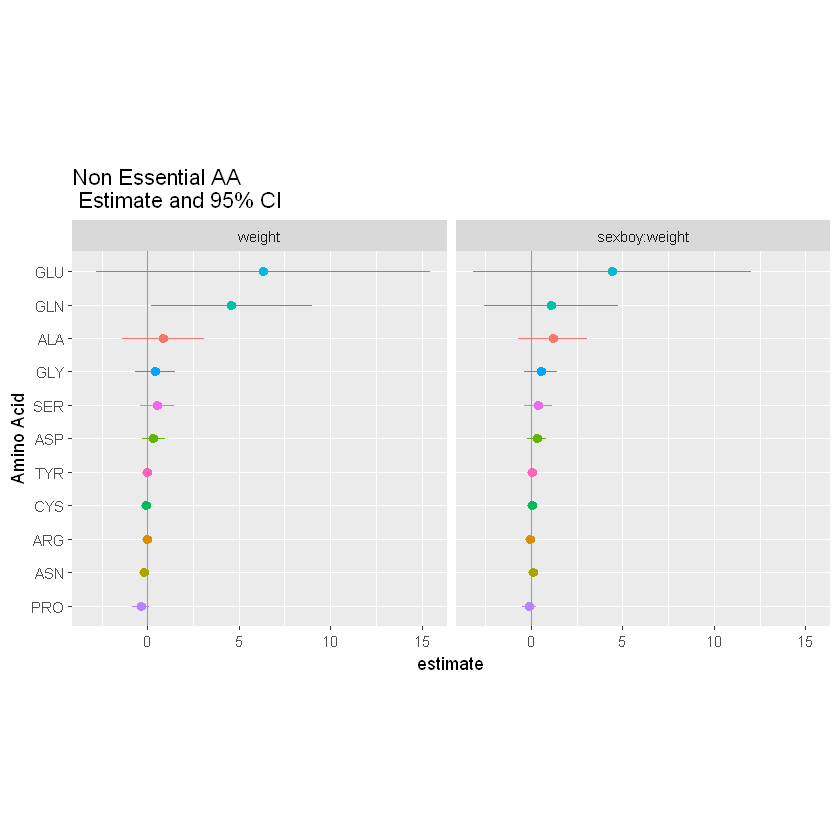

In [105]:
#png(filename="./plots/weight_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(weightCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) +
    ggtitle('Non Essential AA \n Estimate and 95% CI') + xlab('Amino Acid') 
#dev.off()

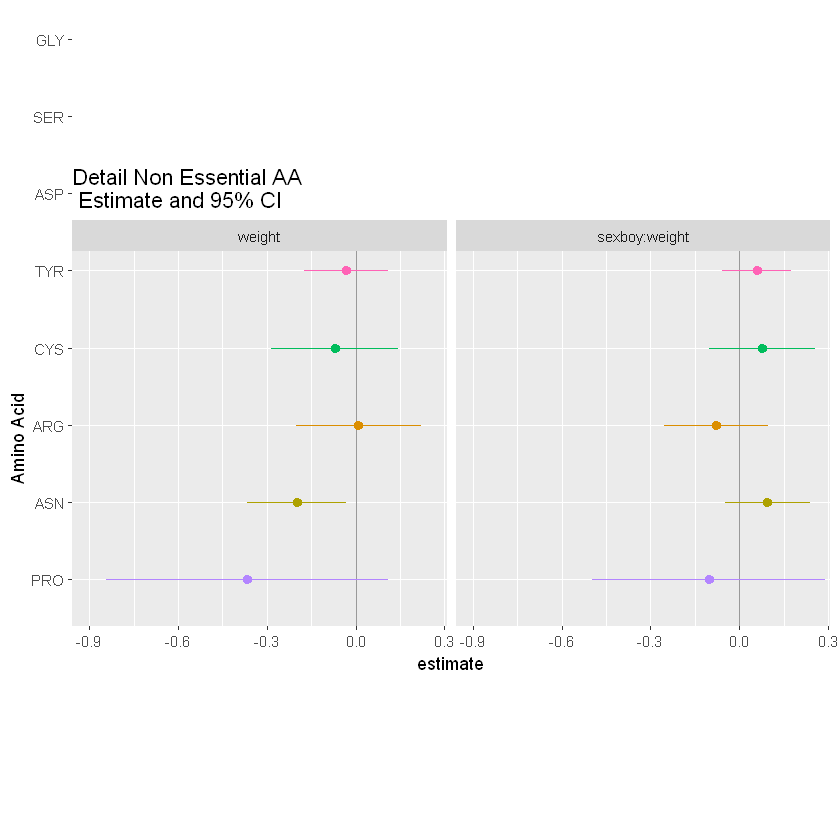

In [107]:
#png(filename="./plots/weight_NE_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(weightCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip(ylim = c(-0.9, 0.25), xlim = c(1, 4.65)) + 
    facet_wrap(~term) +
    ggtitle('Detail Non Essential AA \n Estimate and 95% CI') + xlab('Amino Acid')   
#dev.off()

In [90]:
AA_E_Nested <- AA_E_Nested %>% mutate(model = me_E_HC, tidy = tidy_E_HC)
AA_NE_Nested <- AA_NE_Nested %>% mutate(model = me_NE_HC, tidy = tidy_NE_HC)

me_NE_HC[[7]]

Linear mixed model fit by REML ['lmerMod']
Formula: level ~ sex + week + head + sex:head + (1 | id)
   Data: df
REML criterion at convergence: 1520.022
Random effects:
 Groups   Name        Std.Dev.
 id       (Intercept) 18.00   
 Residual             33.85   
Number of obs: 153, groups:  id, 54
Fixed Effects:
(Intercept)       sexboy         week         head  sexboy:head  
  -187.1091     -18.2737       0.9058       7.2788       0.6601  

In [133]:
headCoef_E <- bind_rows(tidy_E_HC) %>% filter(grepl("head", term))
headCoef_NE <- bind_rows(tidy_NE_HC) %>% filter(grepl("head", term))

headCoef_E
headCoef_NE

term,estimate,std.error,statistic,AA
head,9.161800e-02,0.068370330,1.340025702,HIS
sexboy:head,2.457392e-02,0.055381922,0.443717272,HIS
head,9.231072e-02,0.042360343,2.179177789,ILE
sexboy:head,-4.853242e-02,0.033080396,-1.467105277,ILE
head,9.701036e-02,0.100839944,0.962023103,LEU
sexboy:head,-1.635066e-02,0.083374557,-0.196110877,LEU
head,-1.168642e-01,0.103059071,-1.133953464,LYS
sexboy:head,-2.234178e-02,0.081774667,-0.273211503,LYS
head,1.541038e-02,0.026320049,0.585499625,MET
sexboy:head,7.227271e-05,0.021395844,0.003377885,MET


term,estimate,std.error,statistic,AA
head,-0.063790506,0.06779015,-0.9409997,ARG
sexboy:head,-0.038137104,0.05189542,-0.7348838,ARG
head,-0.039830383,0.20874603,-0.1908079,ASP
sexboy:head,0.226836301,0.16262895,1.3948089,ASP
head,0.888071096,0.72341106,1.2276161,ALA
sexboy:head,0.625037171,0.56958794,1.0973497,ALA
head,-0.098196143,0.05468768,-1.7955807,ASN
sexboy:head,0.062558702,0.04492780,1.3924274,ASN
head,-0.010690948,0.07015613,-0.1523879,CYS
sexboy:head,0.063805427,0.05395179,1.1826378,CYS


In [129]:
sexCoef_E <- bind_rows(tidy_E_W) %>% filter(grepl("sexboy$", term))
sexCoef_NE <- bind_rows(tidy_NE_W) %>% filter(grepl("sexboy$", term))


headCoef_E <- rbind(headCoef_E, sexCoef_E)
headCoef_NE <- rbind(headCoef_NE, sexCoef_NE)

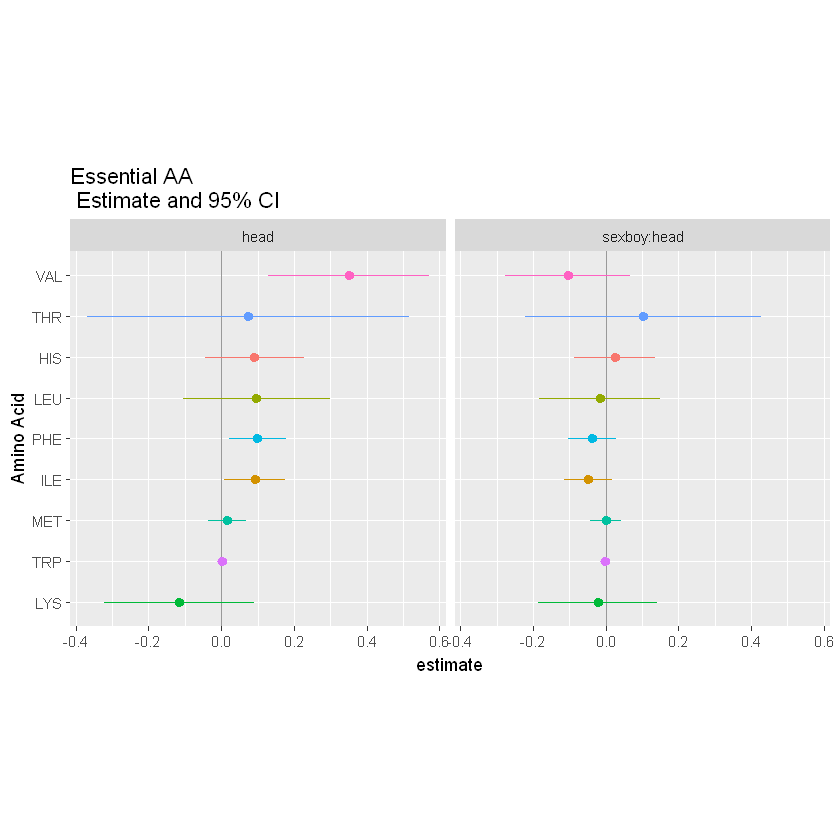

In [134]:
#png(filename="./plots/head_E.png", units="cm", width=20, height=20, res = 300)
ggplot(headCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) +
    ggtitle('Essential AA \n Estimate and 95% CI') + xlab('Amino Acid')   
#dev.off()

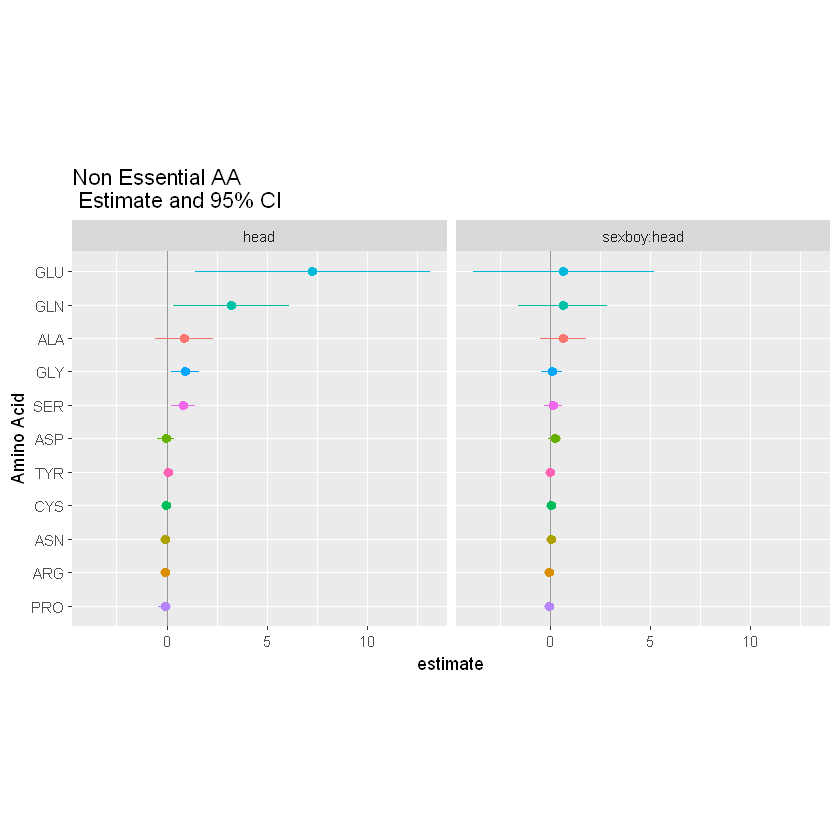

In [135]:
#png(filename="./plots/head_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(headCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip() + 
    facet_wrap(~term) +
    ggtitle('Non Essential AA \n Estimate and 95% CI') + xlab('Amino Acid')   
#dev.off()

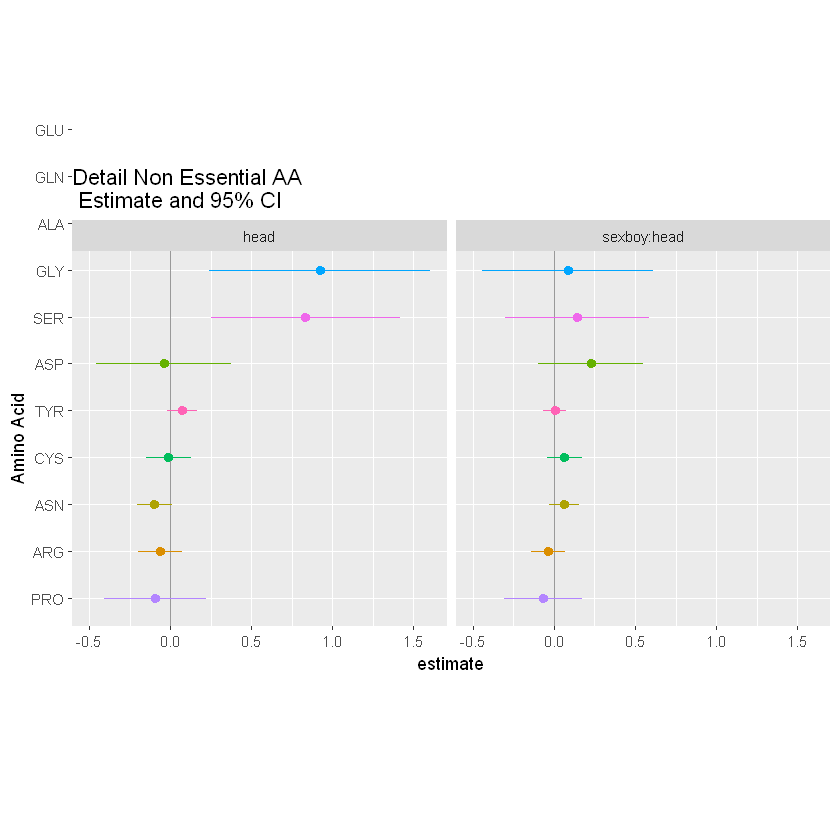

In [137]:
#png(filename="./plots/head_NE_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(headCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none", aspect.ratio = 1) + 
    coord_flip(ylim = c(-0.5, 1.6), xlim = c(1, 7.8)) + 
    facet_wrap(~term) +
    ggtitle('Detail Non Essential AA \n Estimate and 95% CI') + xlab('Amino Acid')   
#dev.off()

### sex controlling for size and weight 

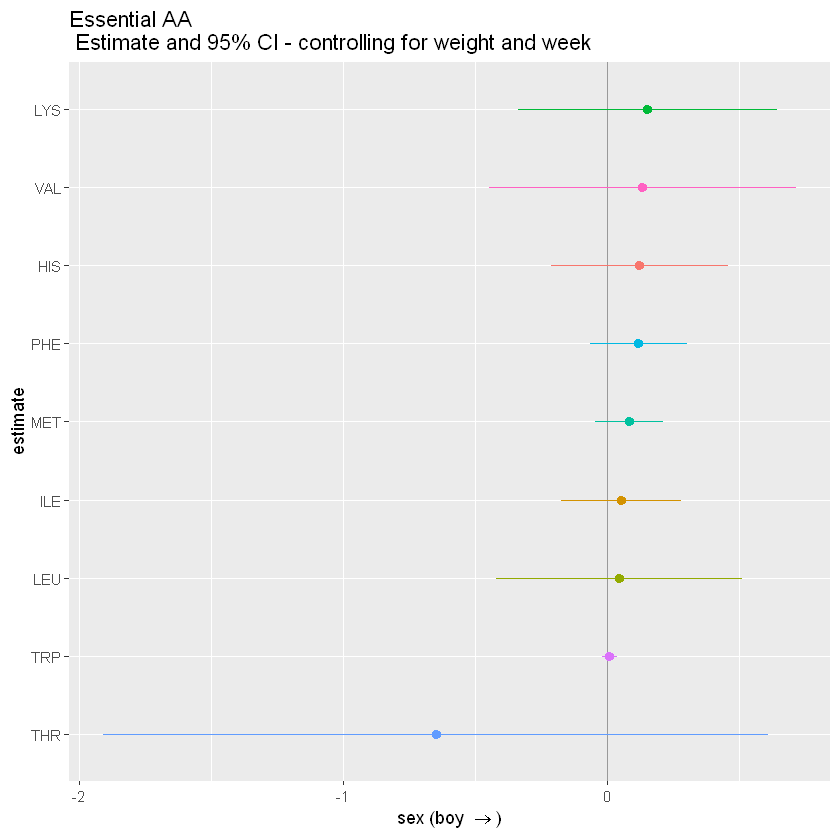

In [49]:
#png(filename="./plots/sex_E.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI - controlling for weight and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

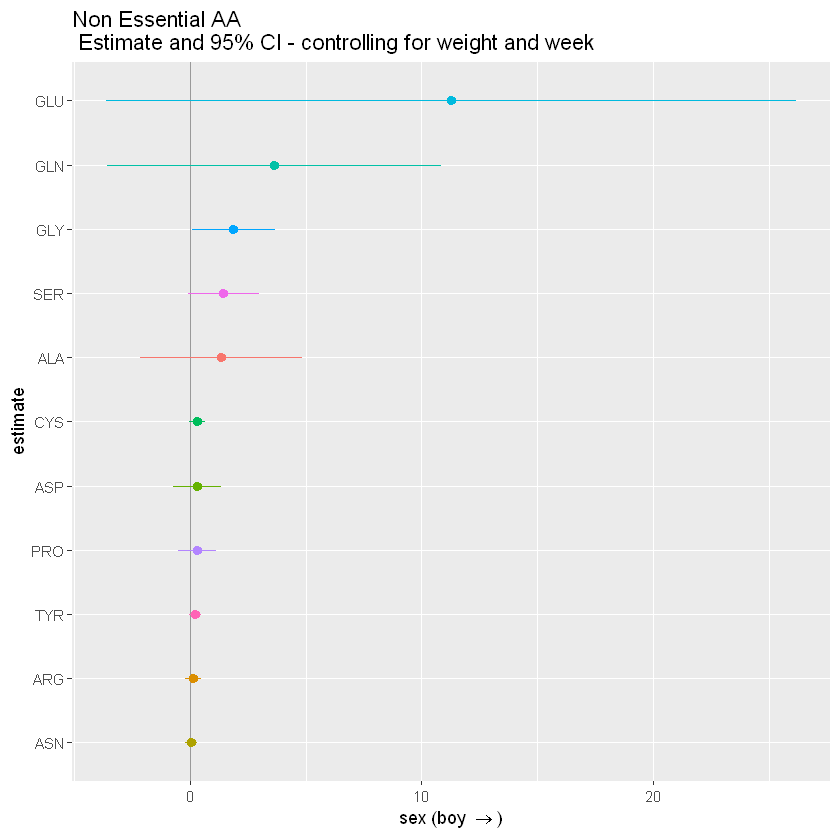

In [51]:
#png(filename="./plots/sex_NE.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI - controlling for weight and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

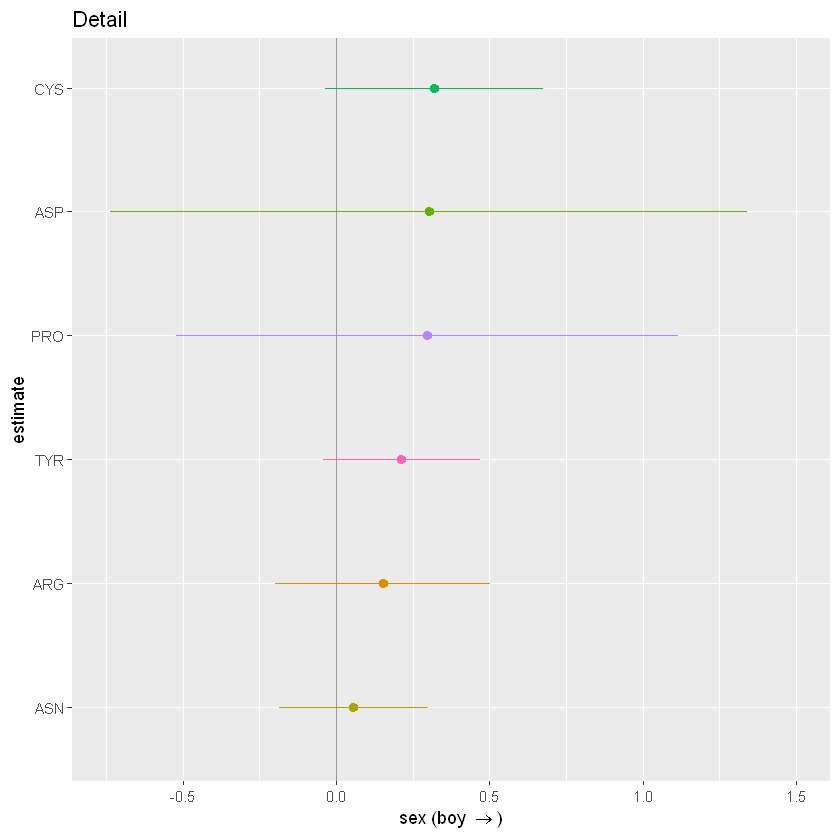

In [55]:
#png(filename="./plots/sex_NE_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-0.75, 1.5), xlim = c(1, 5.8)) + 
    ggtitle('Detail') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

In [56]:
sexCoef_E_HC <- bind_rows(tidy_E_HC) %>% filter(grepl("sex", term))
sexCoef_NE_HC <- bind_rows(tidy_NE_HC) %>% filter(grepl("sex", term))

sexCoef_E_HC
sexCoef_NE_HC

term,estimate,std.error,statistic,AA
sexboy,0.033653895,0.16654079,0.20207598,HIS
sexboy,0.029099657,0.11118122,0.26173176,ILE
sexboy,-0.007958073,0.23761662,-0.03349123,LEU
sexboy,0.226094656,0.26104797,0.86610387,LYS
sexboy,0.072466361,0.06371412,1.13736728,MET
sexboy,0.084390439,0.09147499,0.92255208,PHE
sexboy,-0.751393945,0.64337250,-1.16789875,THR
sexboy,0.009723059,0.01378500,0.70533624,TRP
sexboy,-0.010395363,0.29036672,-0.03580081,VAL


term,estimate,std.error,statistic,AA
sexboy,0.2065960,0.1842581,1.1212316,ARG
sexboy,0.1230930,0.5403108,0.2278189,ASP
sexboy,0.2120318,1.8293545,0.1159053,ALA
sexboy,0.0800377,0.1280958,0.6248266,ASN
sexboy,0.2989439,0.1869555,1.5990110,CYS
sexboy,1.1919557,0.9086241,1.3118250,GLY
sexboy,5.5436361,7.7833029,0.7122472,GLU
sexboy,1.3919164,3.8663011,0.3600124,GLN
sexboy,0.4135682,0.4249354,0.9732495,PRO
sexboy,0.8979458,0.7890213,1.1380501,SER


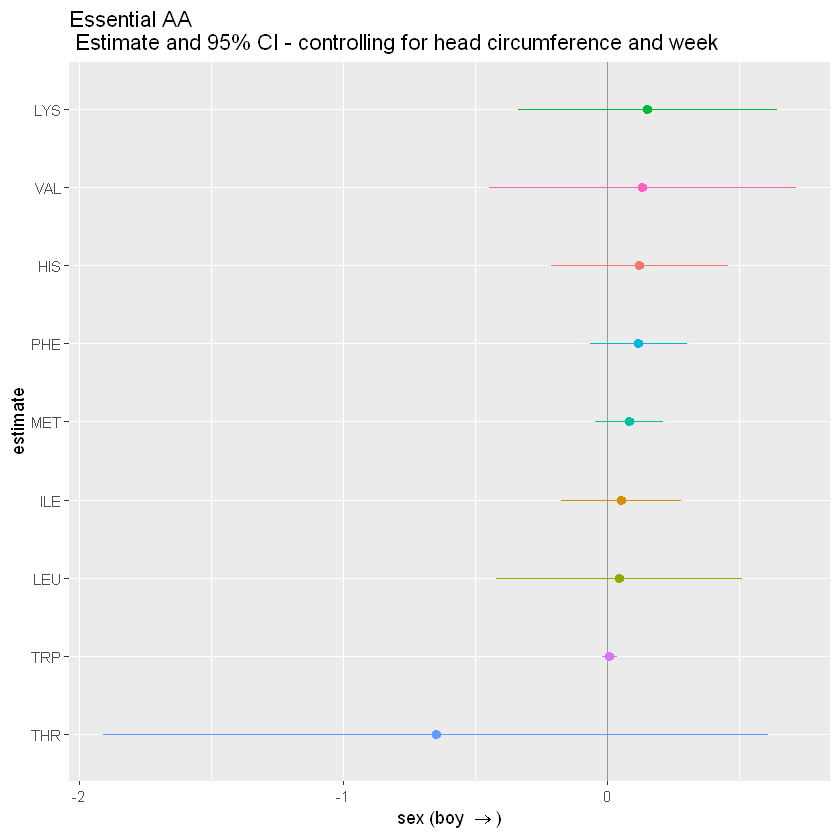

In [58]:
#png(filename="./plots/sex_E_HC.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_E, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Essential AA \n Estimate and 95% CI - controlling for head circumference and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

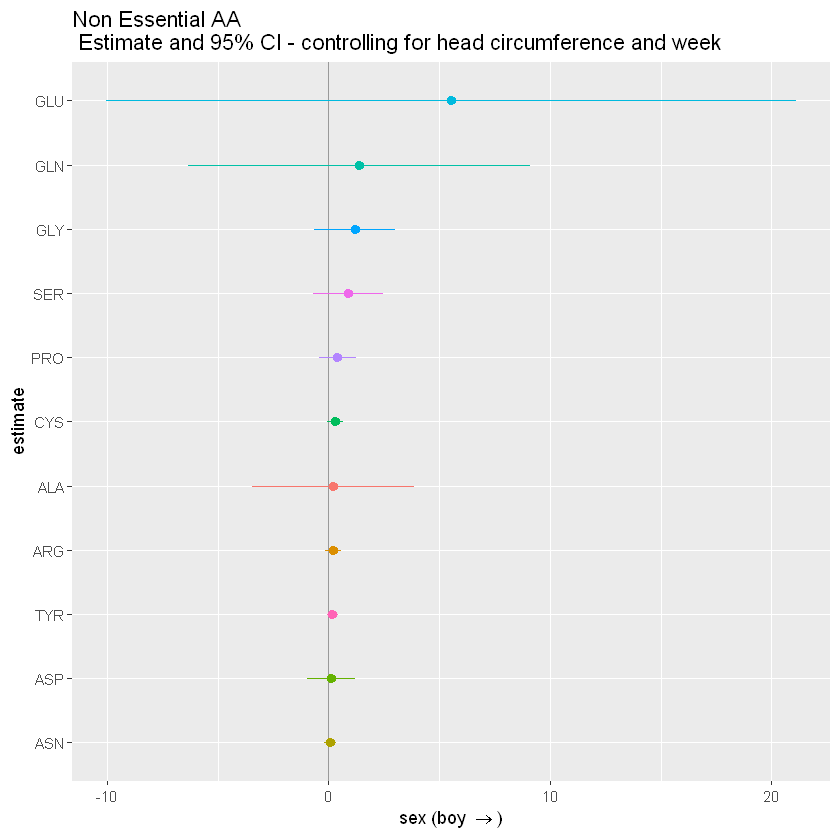

In [71]:
#png(filename="./plots/sex_NE_HC.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_HC, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip() + 
    ggtitle('Non Essential AA \n Estimate and 95% CI - controlling for head circumference and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

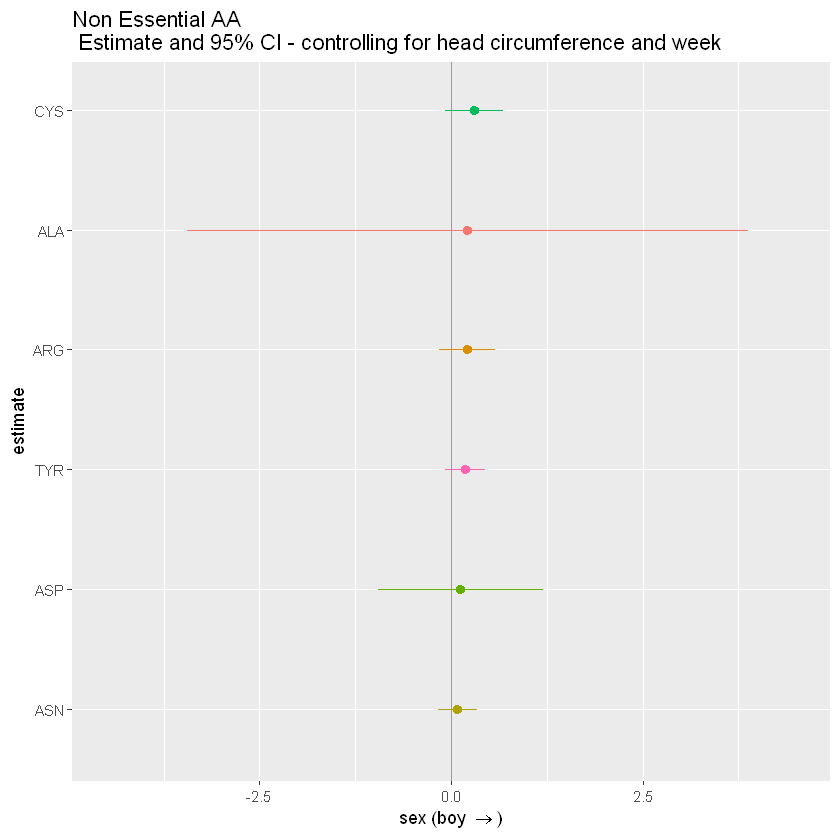

In [73]:
#png(filename="./plots/sex_NE_HC_detail.png", units="cm", width=20, height=20, res = 300)
ggplot(sexCoef_NE_HC, aes(x = reorder(AA, estimate), y = estimate, color = AA)) + 
    geom_hline(yintercept = 0, alpha = 0.4) + 
    geom_point() + geom_pointrange( aes(x = AA, ymin = estimate - 2*std.error, ymax = estimate + 2*std.error)) + 
    theme(legend.position = "none") + 
    coord_flip(ylim = c(-4.5, 4.5), xlim = c(1, 5.8)) + 
    ggtitle('Non Essential AA \n Estimate and 95% CI - controlling for head circumference and week') + 
    xlab('estimate') + ylab(TeX('sex (boy $\\rightarrow$)'))   
#dev.off()

## Group and Free AA levels

In [38]:
table = table( AA_E %>% select(sex, group)) 
print(table)

      group
sex    teen adult
  girl   13    13
  boy    24    11


Teen mothers have almost twice the number of boys: 24 boys and 13 girls. Is there an assosiation between group and sex? 


$H_0:$ group and sex are independent.

In [37]:
print(chisq.test(table))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 1.448, df = 1, p-value = 0.2288



$P(independence) \approx 0.23$ 

### The model: 

$AA = \alpha_0 + \alpha_1 \ group + \alpha_2 \ sex + \alpha_{id}$